In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Scaffolds import MurckoScaffold

In [2]:
import csv
with open('Tomas_Otava_CDG_Epidermal_growth_factor_receptor_erbB1_list_of_compounds.csv','r') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=";")
    lig_MOLECULES = []
    for x in reader:
        mol = Chem.MolFromSmiles(x['Smiles'])
        pchembl = x['pChEMBL Value']
        if not pchembl:
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl))
        lig_MOLECULES.append(mol)
len(lig_MOLECULES)

12496

Načtení erbB1

In [3]:
suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [10:16:25] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [10:16:25] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [10:16:25] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [10:16:25] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [10:16:25] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [10:16:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:16:26] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [10:16:26] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:16:26] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [10:16:26] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [10:16:26] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [10:16:26] Can't kek

RDKit ERROR: [10:16:27] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [10:16:27] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:16:27] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [10:16:27] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:16:27] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [10:16:27] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [10:16:27] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [10:16:27] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [10:16:27] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [10:16:27] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [10:16:27] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [10:16:28] ERROR: Explicit valence for atom # 17 Mg, 4, is greater than permitted
RDKit ERROR: [10:16:28] Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [10:16:28] ERROR: Could not sanitize molecule ending on line 645068
RDKit ERROR: [10:16:28] ERROR: Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [10:16:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:16:28] ERROR: Could not sanitize molecule ending on line 659994
RDKit ERROR: [10:16:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:16:30] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [10:16:30] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [10:16:30] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [10:16:30] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [10:1

7113

Načtení drugbanku

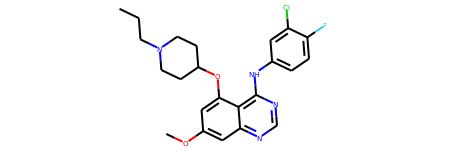

In [4]:
lig_MOLECULES[3344]

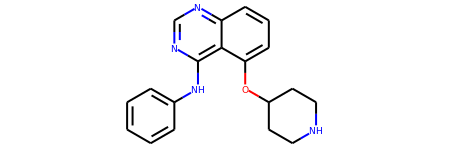

In [5]:
scaffold_3344 = MurckoScaffold.GetScaffoldForMol(lig_MOLECULES[3344])
scaffold_3344

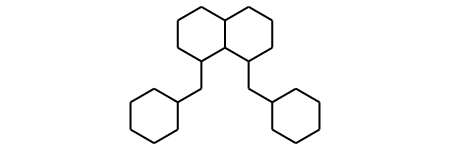

In [6]:
scaffold_3344_2 = MurckoScaffold.MakeScaffoldGeneric(scaffold_3344)
scaffold_3344_2

Opět moje oblíbená molekula, poslední krok jsem již nemusel dělat.

A teď definice funkce.

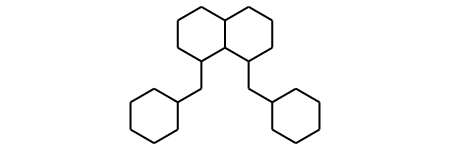

In [7]:
def DoScaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol)
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol)
    except ValueError:
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff)
    return scaff
DoScaffold(lig_MOLECULES[3344])

In [8]:
drugbank_scaffolds = [DoScaffold(drug) for drug in drugs]
drugbank_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(drugbank_scaffolds) if mol]
drugbank_scaffolds_smiles[:20]

RDKit ERROR: [10:16:30] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [10:16:31] Explicit valence for atom # 90 C, 6, is greater than permitted
RDKit ERROR: [10:16:31] Explicit valence for atom # 62 C, 6, is greater than permitted
RDKit ERROR: [10:16:31] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [10:16:34] Explicit valence for atom # 31 C, 6, is greater than permitted
RDKit ERROR: [10:16:34] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [10:16:36] Explicit valence for atom # 23 C greater than permitted
RDKit ERROR: [10:16:36] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [10:16:36] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [10:16:37] Explicit valence for atom # 40 C, 6, is greater than permitted
RDKit ERROR: [10:16:37] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [10:16:37] Explicit valence for atom # 31

[(0,
  'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1'),
 (1,
  'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1'),
 (2, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (3,
  'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1'),
 (4, 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'),
 (5, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (6, 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1'),
 (7, 'C1CCCCC1'),
 (9, 'C1CCC(CCC2CCC3CCCCC3C2)CC1'),
 (10, 'C1CCCC1'),
 (11, 'C1CCC2C(C1)CCC2C1CCCC1'),
 (12, ''),
 (13, 'C1CCCCC1'),
 (14, 'C1CC2CCCC2C1'),
 (15, ''),
 (16, ''),
 (17, ''),
 (18, 'C1CCCC1'),
 (19, ''),
 (20, '')]

In [9]:
scaffolds2drugs = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles}
for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles:
    scaffolds2drugs[scaffoldsmiles].append(drug_idx)

In [10]:
scaffold_drugcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2drugs.items()]

In [11]:
scaffold_drugcount.sort(key=lambda x: x[1], reverse=True)
scaffold_drugcount[:20]

[('C1CCCCC1', 1039),
 ('', 976),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 169),
 ('C1CCC2C(C1)CCC2C1CCCC1', 165),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106),
 ('C1CCC(C2CCCCC2)CC1', 105),
 ('C1CCC(CC2CCCC2)CC1', 74),
 ('C1CCC(CCCC2CCCCC2)CC1', 66),
 ('C1CCC2CC3CCCCC3CC2C1', 57),
 ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
 ('C1CCC(CCCCC2CCCCC2)CC1', 53),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 48),
 ('C1CCC(CCC2CCCC2)CC1', 43),
 ('C1CCC(C2CCC3CCCCC3C2)CC1', 41),
 ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 34)]

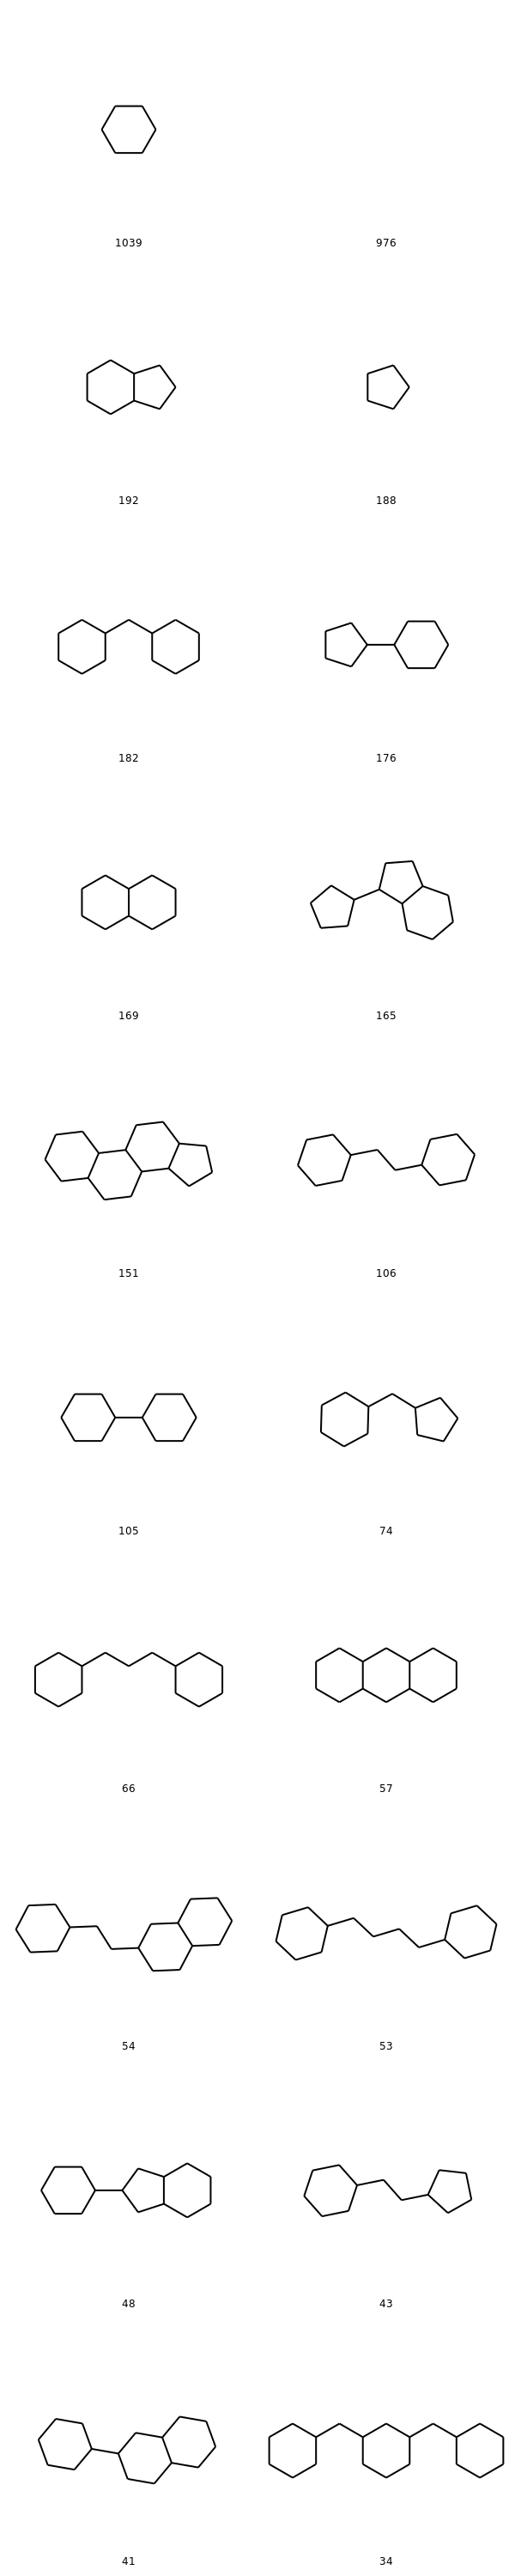

In [12]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_drugcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_drugcount[:20]])

In [13]:
erbB1_scaffolds = [DoScaffold(x) for x in lig_MOLECULES]
erbB1_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(erbB1_scaffolds) if mol]
erbB1_scaffolds_smiles[:20]

[(0, 'C1CCC(CC2CCCC3CCC(CC4CCCCC4)C32)CC1'),
 (1, 'C1CCC(CCCCCC2CCCCC2)CC1'),
 (2, 'C1CCC(CCC2CCCC(CC3CCCC4CCCCC43)C2)CC1'),
 (3, 'C1CCC(CC2CCCC2CCCCC2CCC(CC3CCCC(CC4CCC(C5CCCCC5)CC4)C3)CC2)CC1'),
 (4, 'C1CCC(CCC2CCC(CCC3CCCCC3)CC2)CC1'),
 (5, 'C1CCC(CC2CCC(CCC3CCC(C4CCCCC4CC4CCCCC4)CC3)CC2)CC1'),
 (6, 'C1CCC(CCC2CCC(CC3CCCCC3CCC3CCCCC3)CC2)CC1'),
 (7, 'C1CCC(CCC2CCC(CCC3CCCCC3)CC2)CC1'),
 (8, 'C1CCC(CCC2CCC(CCC3CCCCC3)CC2)CC1'),
 (9, 'C1CCC(CCC2CCC(CC3CCCCC3C3CCCCC3)CC2)CC1'),
 (10, 'C1CCC(CCC2CCC(CC3CCCCC3CCC3CCCC3)CC2)CC1'),
 (11, 'C1CCC(CCCC2CCC(C3CCCC4CCCCC43)CC2)CC1'),
 (12, 'C1CCC(C2CCC(C3CCCCC3)C2)CC1'),
 (13, 'C1CCC(C2CCC(C3CCCCC3)C2)CC1'),
 (14, 'C1CCC(CCC2CCCCC2)CC1'),
 (15, 'C1CCC(CCCCCC2CCC3CC(C4CCCCC4)CCC3C2)CC1'),
 (16, 'C1CCC(C2CCC3CCCCC3C2)CC1'),
 (17, 'C1CCC(CCCCC2CCC3CCCC(CC4CCCCC4)C3C2)CC1'),
 (18, 'C1CCC(C2CCC3CCCCC3C2)CC1'),
 (19, 'C1CCC(C2CCC3CCCCC3C2)CC1')]

In [14]:
scaffolds2erbB1 = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in erbB1_scaffolds_smiles}
for drug_idx, scaffoldsmiles in erbB1_scaffolds_smiles:
    scaffolds2erbB1[scaffoldsmiles].append(drug_idx)

In [15]:
scaffold_erbB1_molcount = [(scaffold, len(x)) for scaffold, x in scaffolds2erbB1.items()]

In [16]:
scaffold_erbB1_molcount.sort(key=lambda x: x[1], reverse=True)
scaffold_erbB1_molcount[:20]

[('C1CCC(CC2CCCC3CCCCC32)CC1', 1725),
 ('C1CCCCC1', 307),
 ('C1CCC(CC2CCCC(CC3CCC(C4CCCCC4)CC3)C2)CC1', 264),
 ('C1CCC(CCC2CCCCC2)CC1', 247),
 ('C1CCC(CCCCC2CCC3CCCC(CC4CCCCC4)C3C2)CC1', 226),
 ('C1CCC(C2CCC3CCCCC3C2)CC1', 187),
 ('C1CCC(CCC2CCC3C(CC4CCCCC4)CCCC3C2)CC1', 167),
 ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 148),
 ('C1CCC(CCC2CCC(CC3CCCC4CCCCC43)CC2)CC1', 140),
 ('C1CCC(CC2CCCC(C3CCC4CCCCC43)C2)CC1', 136),
 ('C1CCC(CCC2CCCC3CC(C4CCCCC4)CC23)CC1', 132),
 ('C1CCC(CC2CCCC3CCCC32)CC1', 122),
 ('C1CCC(CC2CCCC3CC4CCCC4CC23)CC1', 120),
 ('C1CCC(C2CCC3CCCCC32)CC1', 110),
 ('C1CCC(CC2CCCC3CC4CCCCC4CCC23)CC1', 110),
 ('C1CCC(CCCC2CCCCC2)CC1', 109),
 ('C1CCC(CCC2CCCC(C3CC4CCCCC4C3C3CCCC(CC4CCC(C5CCC(C6CCCCC6)CC5)CC4)C3)C2)CC1',
  108),
 ('C1CCC(CCCCCC2CCC3CCCC(CC4CCCCC4)C3C2)CC1', 102),
 ('C1CCC(CCC2CCC(CC3CCCC4CCC(C5CCCC5)CC43)CC2)CC1', 98),
 ('C1CCC(CCC2CCCC(C3CC4CCCCC4C3C3CCCC(CC4CCC(C5CCCCC5)CC4)C3)C2)CC1', 94)]

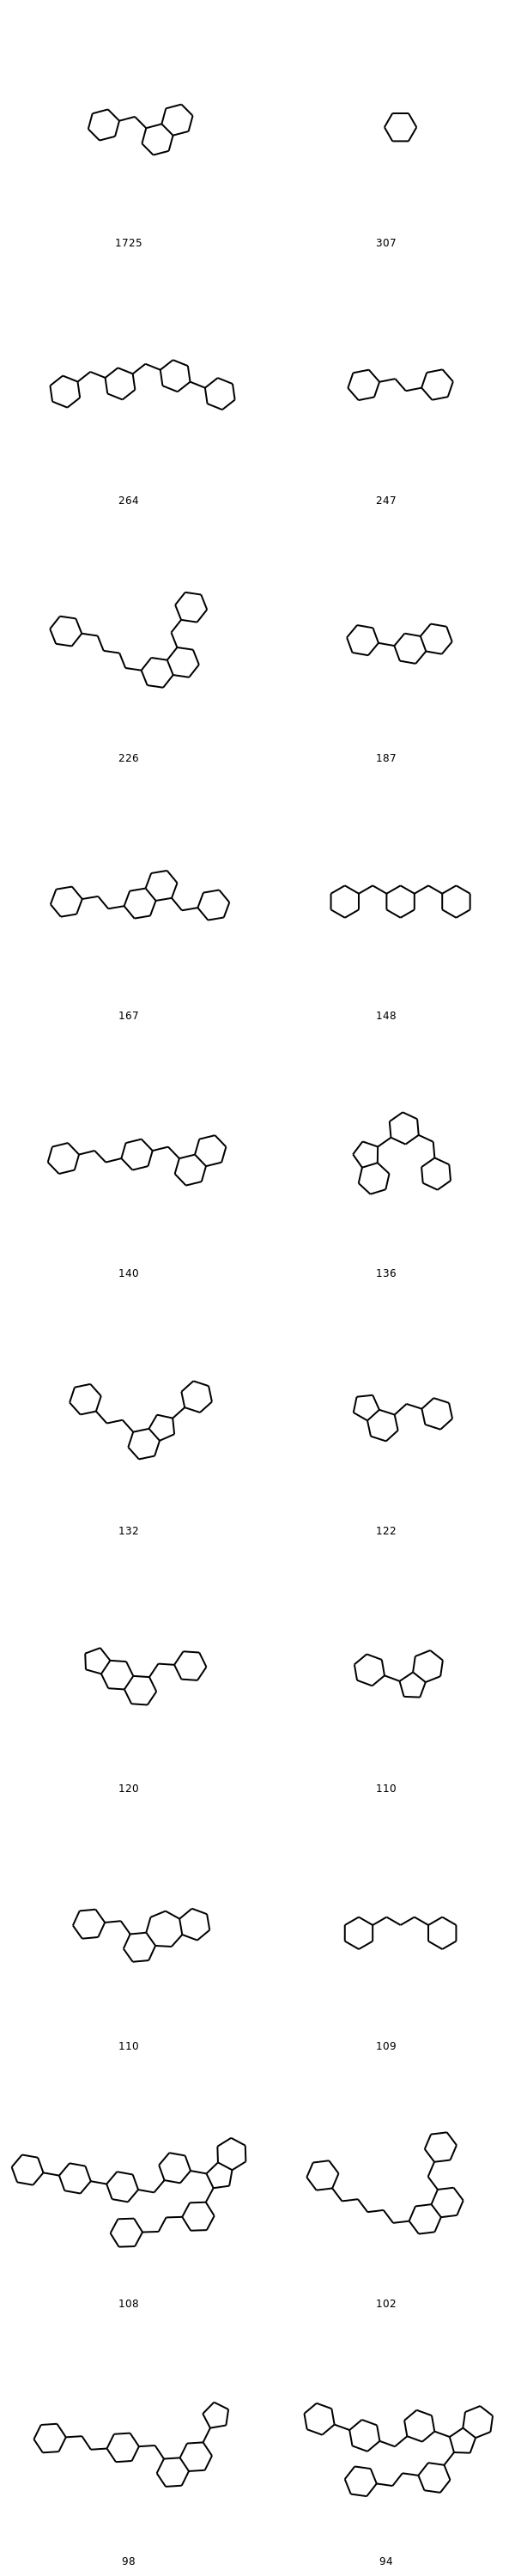

In [17]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_erbB1_molcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_erbB1_molcount[:20]])

Tak nejpočetnější scaffold odpovídá molekulám již používaných inhibitorů tyrosinových proteas, které jsem diskutoval posledně.

Jinak musím říct, že nejpočetnější scaffoldy tohoto setu jsou si vcelku podobné. Ve většině případů je to substituavaný bicyklický základ, na který je napojen jeden nebo dva další cykly.

OVŠEM pozor již minule jsem celkem dost narazil na duplicitu, tak zkusíme sjet experimenty ještě jednou na odduplicitovaném (nejsem si jisty správným významem slova :D :D) setu

In [21]:
ligands_no_duplicates_smiles = []
for l in lig_MOLECULES:
    if Chem.MolToSmiles(l) in ligands_no_duplicates_smiles:
        continue
    ligands_no_duplicates_smiles.append(Chem.MolToSmiles(l))
len(ligands_no_duplicates_smiles)

8889

In [22]:
ligands_no_duplicates = [Chem.MolFromSmiles(l) for l in ligands_no_duplicates_smiles]

In [23]:
erbB1_scaffolds_new = [DoScaffold(x) for x in ligands_no_duplicates]
erbB1_scaffolds_smiles_new = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(erbB1_scaffolds_new) if mol]

In [24]:
scaffolds2erbB1_new = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in erbB1_scaffolds_smiles_new}
for drug_idx, scaffoldsmiles in erbB1_scaffolds_smiles_new:
    scaffolds2erbB1_new[scaffoldsmiles].append(drug_idx)

In [25]:
scaffold_erbB1_molcount_new = [(scaffold, len(x)) for scaffold, x in scaffolds2erbB1_new.items()]

In [26]:
scaffold_erbB1_molcount_new.sort(key=lambda x: x[1], reverse=True)

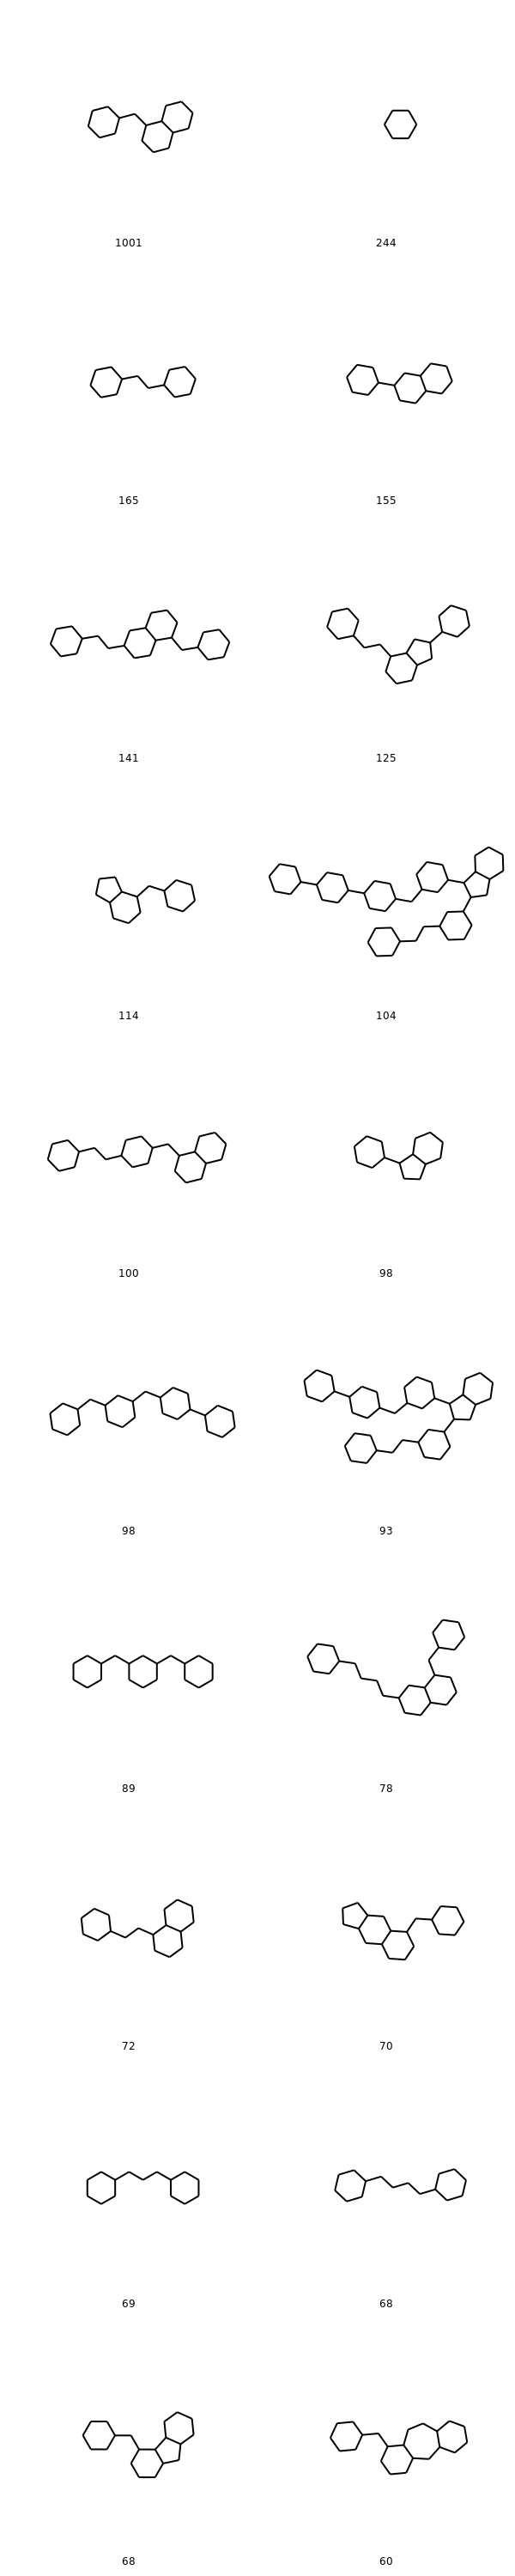

In [28]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_erbB1_molcount_new[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_erbB1_molcount_new[:20]])

No je to celkem síla svou pozuci v žebříčku si udržely pouze první dva scaffoldy a samozřejmě v menším měřítku.

Nejpočetnější scaffold je stále v drtivém předstihu ovšem vypadá to, že 72 % látek s tímto scaffoldem je v setu duplicitováno (doufám, že jsem někde neudělal nějakou botu 1725 - 1001 = 724 duplicit, čili 724 látek z 1001 bylo duplicitovano -> 72 %)

To je celkem velká část celkové duplicity.

In [18]:
scaffold_representatives = {}
for scaffold, ligands in scaffolds2erbB1.items():
    scaffold_representatives[scaffold] = sorted(ligands,
                                                key=lambda x: lig_MOLECULES[x].GetProp('pChEMBL'),
                                                reverse=True)[0]
len(scaffold_representatives), scaffold_representatives

(1569,
 {'C1CCC(CC2CCCC3CCC(CC4CCCCC4)C32)CC1': 575,
  'C1CCC(CCCCCC2CCCCC2)CC1': 2197,
  'C1CCC(CCC2CCCC(CC3CCCC4CCCCC43)C2)CC1': 2,
  'C1CCC(CC2CCCC2CCCCC2CCC(CC3CCCC(CC4CCC(C5CCCCC5)CC4)C3)CC2)CC1': 3,
  'C1CCC(CCC2CCC(CCC3CCCCC3)CC2)CC1': 9126,
  'C1CCC(CC2CCC(CCC3CCC(C4CCCCC4CC4CCCCC4)CC3)CC2)CC1': 5,
  'C1CCC(CCC2CCC(CC3CCCCC3CCC3CCCCC3)CC2)CC1': 9481,
  'C1CCC(CCC2CCC(CC3CCCCC3C3CCCCC3)CC2)CC1': 9,
  'C1CCC(CCC2CCC(CC3CCCCC3CCC3CCCC3)CC2)CC1': 2705,
  'C1CCC(CCCC2CCC(C3CCCC4CCCCC43)CC2)CC1': 11,
  'C1CCC(C2CCC(C3CCCCC3)C2)CC1': 93,
  'C1CCC(CCC2CCCCC2)CC1': 1185,
  'C1CCC(CCCCCC2CCC3CC(C4CCCCC4)CCC3C2)CC1': 15,
  'C1CCC(C2CCC3CCCCC3C2)CC1': 8284,
  'C1CCC(CCCCC2CCC3CCCC(CC4CCCCC4)C3C2)CC1': 12195,
  'C1CCC(CC2CCCC3CCCCC32)CC1': 424,
  'C1CCCCC1': 6200,
  'C1CCC(CCC2CC3CCCCC3C2)CC1': 10234,
  'C1CCC(CCC2CCC3CCCCC3C2)CC1': 25,
  'C1CCC(CCCC2CCCCC2)CC1': 454,
  'C1CCC(C2CCCC(CC3CCCC4CCCCC43)C2)C1': 6156,
  'C1CCC(CCCCC2CCC3C(CC4CCCCC4)CCCC3C2)CC1': 1692,
  'C(CCCCCCC1CCCCC1)CCCCCC1

In [19]:
scaffold_representatives4visualization = []
for scaffold, ligandcount in scaffold_erbB1_molcount:
    mol = Chem.MolFromSmiles(scaffold)
    mol.SetProp('legend', str(ligandcount) + " ligands")
    scaffold_representatives4visualization.append(mol)
    representative_mol = lig_MOLECULES[scaffold_representatives[scaffold]]
    representative_mol.SetProp('legend', "#{} | pChEMBL {}".format(str(scaffold_representatives[scaffold]),
                                                            representative_mol.GetProp('pChEMBL')))
    scaffold_representatives4visualization.append(representative_mol)
len(scaffold_representatives4visualization), scaffold_representatives4visualization[:20]

(3138,
  <rdkit.Chem.rdchem.Mol at 0x7ff7a13cb260>])

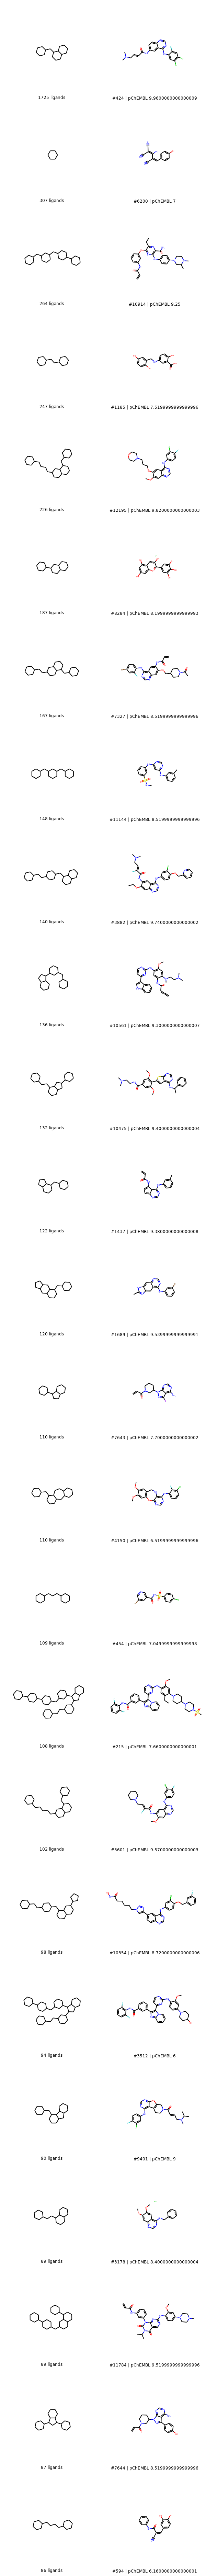

In [20]:
Draw.MolsToGridImage(scaffold_representatives4visualization[:50],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[mol.GetProp('legend')
                              for mol in scaffold_representatives4visualization[:50]])

Nakonec přikládám tabulku různých nejpočetnějšch scaffoldů a jejich potenciální zástupce.